In [1]:
import numpy as np
import pandas as pd
import sys
import os
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
file_folder = os.getcwd()
print(file_folder)
train_data_path = file_folder +'\\data\\train.csv'
test_data_path = file_folder + '\\data\\test.csv'
store_data_path = file_folder +'\\data\\store.csv'
print(train_data_path)

F:\GitHub\Rossman Sales\Rossmann-Store-Sales
F:\GitHub\Rossman Sales\Rossmann-Store-Sales\data\train.csv


# Data Field

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store 商店ID
- Sales - the turnover for any given day (this is what you are predicting) 所给日期的该商店的营销额
- Customers - the number of customers on a given day 当天到店消费者
- Open - an indicator for whether the store was open: 0 = closed, 1 = open 商店是否开张
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None 国家节日（a-公共假期，b-复活节，c-圣诞节，0 - 无）
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools 表示是否收公共学校关闭的影响
- StoreType - differentiates between 4 different store models: a, b, c, d 商店类型
- Assortment - describes an assortment level: a = basic, b = extra, c = extended 产品组合分类
- CompetitionDistance - distance in meters to the nearest competitor store 竞争商店距离（米）
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened 最近的竞争商店开张的时间（月/年）
- Promo - indicates whether a store is running a promo on that day 是否商店当天有优惠
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating 是否参加连续优惠
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2 商店参加连续优惠的时间（年/日历周）
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g.  "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store 连续优惠的间隔


In [4]:
data  = pd.read_csv(train_data_path,na_values = np.nan,low_memory=False)

In [5]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [122]:
data['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [35]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [7]:
data.groupby('StateHoliday').Store.count()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: Store, dtype: int64

In [8]:
data.shape

(1017209, 9)

In [9]:
def ShowSales(storeID = 1, data_range_min = 0, data_range_max = 50):
    
    sale_date = data[data.Store == storeID].Date[data_range_min:data_range_max]
    store_sales = data[data.Store == storeID].Sales[data_range_min:data_range_max]
#     plt.figure(figsize = (100,30))
    plt.autoscale()
    plt.bar(sale_date,store_sales)
    plt.xticks(rotation = 90)
    plt.show()
    return

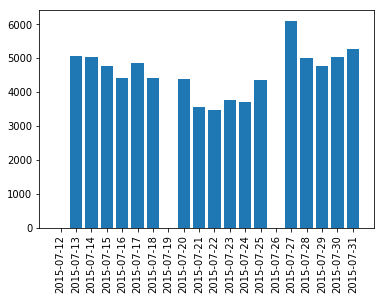

In [10]:
ShowSales(data_range_max = 20)

In [11]:
sale_date = data[data.Store == 1].Date[:20]
store_sales = data[data.Store == 1].Sales[:20]

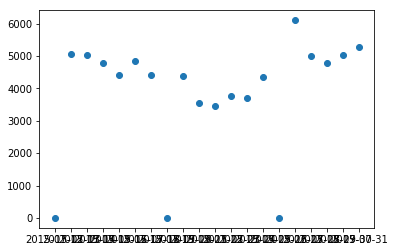

In [12]:
plt.scatter(sale_date.astype(str),store_sales)
plt.show()

In [119]:
store_gp = data.groupby('Store')
Group_store = store_gp
Group_store['Date'].unique()

Store
1       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
2       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
3       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
4       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
5       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
6       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
7       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
8       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
9       [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
10      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
11      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
12      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
13      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
14      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
15      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
16      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
17      [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
18      

In [37]:
records_counts = store_gp.Store.count()
records_counts.value_counts(normalize =True)

942    0.837668
758    0.161435
941    0.000897
Name: Store, dtype: float64

In [104]:
a_filter = pd.DataFrame(records_counts == 942)
a_filter= a_filter.reset_index(drop =  True)
a_filter['Store']

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13       True
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21      False
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1085     True
1086     True
1087     True
1088     True
1089     True
1090     True
1091    False
1092     True
1093    False
1094     True
1095     True
1096     True
1097     True
1098     True
1099     True
1100     True
1101    False
1102     True
1103    False
1104     True
1105     True
1106    False
1107     True
1108    False
1109     True
1110     True
1111     True
1112     True
1113     True
1114     True
Name: Store, Length: 1115, dtype: bool

In [105]:
Group_store[a_filter['Store']]

C:\Users\XuanYang\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [44]:
records_counts == 942

Store
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13      False
14       True
15       True
16       True
17       True
18       True
19       True
20      False
21       True
22      False
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30       True
        ...  
1086     True
1087     True
1088     True
1089     True
1090     True
1091     True
1092    False
1093     True
1094    False
1095     True
1096     True
1097     True
1098     True
1099     True
1100     True
1101     True
1102    False
1103     True
1104    False
1105     True
1106     True
1107    False
1108     True
1109    False
1110     True
1111     True
1112     True
1113     True
1114     True
1115     True
Name: Store, Length: 1115, dtype: bool

In [55]:
records_a = [True,False,True]

In [61]:
store_gp.Store.

Exception: Column(s) Store already selected

In [15]:
store_gp.Sales.agg(['sum','mean','std'])

,sum,mean,std
Store,,,
1,3716854,3945.704883,2015.417840
2,3883858,4122.991507,2363.628674
3,5408261,5741.253715,3298.782559
4,7556507,8021.769639,4012.592818
5,3642818,3867.110403,2389.609890
6,4297758,4562.375796,2527.359298
7,6930202,7356.902335,3969.299824
8,4342857,4610.251592,2696.883772
9,5112061,5426.816348,2891.687966


In [16]:
store_data = pd.read_csv(store_data_path,na_filter=np.nan,low_memory=False)

In [17]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [21]:
train_date = data['Date']
train_date.head

<bound method NDFrame.head of 0          2015-07-31
1          2015-07-31
2          2015-07-31
3          2015-07-31
4          2015-07-31
5          2015-07-31
6          2015-07-31
7          2015-07-31
8          2015-07-31
9          2015-07-31
10         2015-07-31
11         2015-07-31
12         2015-07-31
13         2015-07-31
14         2015-07-31
15         2015-07-31
16         2015-07-31
17         2015-07-31
18         2015-07-31
19         2015-07-31
20         2015-07-31
21         2015-07-31
22         2015-07-31
23         2015-07-31
24         2015-07-31
25         2015-07-31
26         2015-07-31
27         2015-07-31
28         2015-07-31
29         2015-07-31
              ...    
1017179    2013-01-01
1017180    2013-01-01
1017181    2013-01-01
1017182    2013-01-01
1017183    2013-01-01
1017184    2013-01-01
1017185    2013-01-01
1017186    2013-01-01
1017187    2013-01-01
1017188    2013-01-01
1017189    2013-01-01
1017190    2013-01-01
1017191    2013-01-01
10

In [22]:
from datetime import datetime

In [28]:
dt1 = datetime(2013,1,1)
dt2 = datetime(2015,7,31)
dt_delta = dt2-dt1
print(dt_delta)

941 days, 0:00:00


In [30]:
1017209/1115

912.295067264574

In [26]:
train_date = pd.to_datetime(train_date)
train_date.min

<bound method Series.min of 0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
5         2015-07-31
6         2015-07-31
7         2015-07-31
8         2015-07-31
9         2015-07-31
10        2015-07-31
11        2015-07-31
12        2015-07-31
13        2015-07-31
14        2015-07-31
15        2015-07-31
16        2015-07-31
17        2015-07-31
18        2015-07-31
19        2015-07-31
20        2015-07-31
21        2015-07-31
22        2015-07-31
23        2015-07-31
24        2015-07-31
25        2015-07-31
26        2015-07-31
27        2015-07-31
28        2015-07-31
29        2015-07-31
             ...    
1017179   2013-01-01
1017180   2013-01-01
1017181   2013-01-01
1017182   2013-01-01
1017183   2013-01-01
1017184   2013-01-01
1017185   2013-01-01
1017186   2013-01-01
1017187   2013-01-01
1017188   2013-01-01
1017189   2013-01-01
1017190   2013-01-01
1017191   2013-01-01
1017192   2013-01-01
1017193   2013-01-01
101719